____    
    
**Название проекта:** Успешные игры
_____
**Описание исследования.**
Проанализировать данные по играм за прошедший период, выявить успешные игры по платформам и жанрам для различных регионов мира.
_____
**Цель исследования.**
Определить потенциально популярный продукт для планирования рекламной кампании.
_____
**Задачи исследования.**
1. Подгрузить файл с данными и изучить общую информацию
2. Подготовить данные
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
_____
**Исходные данные.**
На входе у нас есть таблица где сведены данные до 2016 года.  

В таблице представлены следующие данные:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Подключение библотек.](#1-bullet)
* [2. Изученеие файлов с данными, получение общей информации.](#2-bullet)

***Часть 2. Подготовка данных:***
* [1. Нахождение и ликвидация пропусков.](#3-bullet)
* [2. Приведение данных к нужным типам.](#4-bullet)
* [3. Нахождение и исправление дубликатов.](#5-bullet)

***Часть 3. Анализ данных:***
* [1. Динамика выпущенных игр по годам.](#6-bullet)
* [2. Выделение популярных платформ по продажам.](#7-bullet)
* [3. Определение времени жизни платформ.](#8-bullet)
* [4. Выбор акуального периода для анализа данных.](#9-bullet)
* [5. Определение и выбор популярных платформ на конец 2016 года.](#10-bullet)
* [6. Оценка влияния оценок от критиков и пользователей на продажи.](#11-bullet)
* [7. Анализ популярных платформ и жанров игр по регионам.](#12-bullet)
* [8. Оценка влияния рейтинга на продажи.](#13-bullet)
* [9. Проверка гипотез.](#14-bullet)

***Часть 4. Общий вывод:***
* [1. Общий вывод.](#15-bullet)

<a id="1-bullet"></a>
# **Подключение необходимых библиотек**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

<a id="2-bullet"></a>

# **Изучение данных**

In [ ]:
try:
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проект по играм/games.csv')
except:
  data = pd.read_csv('/datasets/games.csv')

Вывожу общую информацию по загруженным данным

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего представлено 16715 строк и 11 столбцов. Представленные типы: строковые и вещественные. Преобразуем названия колонок в надлежащий вид. И далее выведим первых 5 строк датафрейма. Также в следующем разделе скорректируем типы столбцов (как минимум уже сейчас видно что года необходимо округлить, и почему то колонка оценка пользователей представлен как тип строка.)

In [ ]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Построим гистограммы распределений.

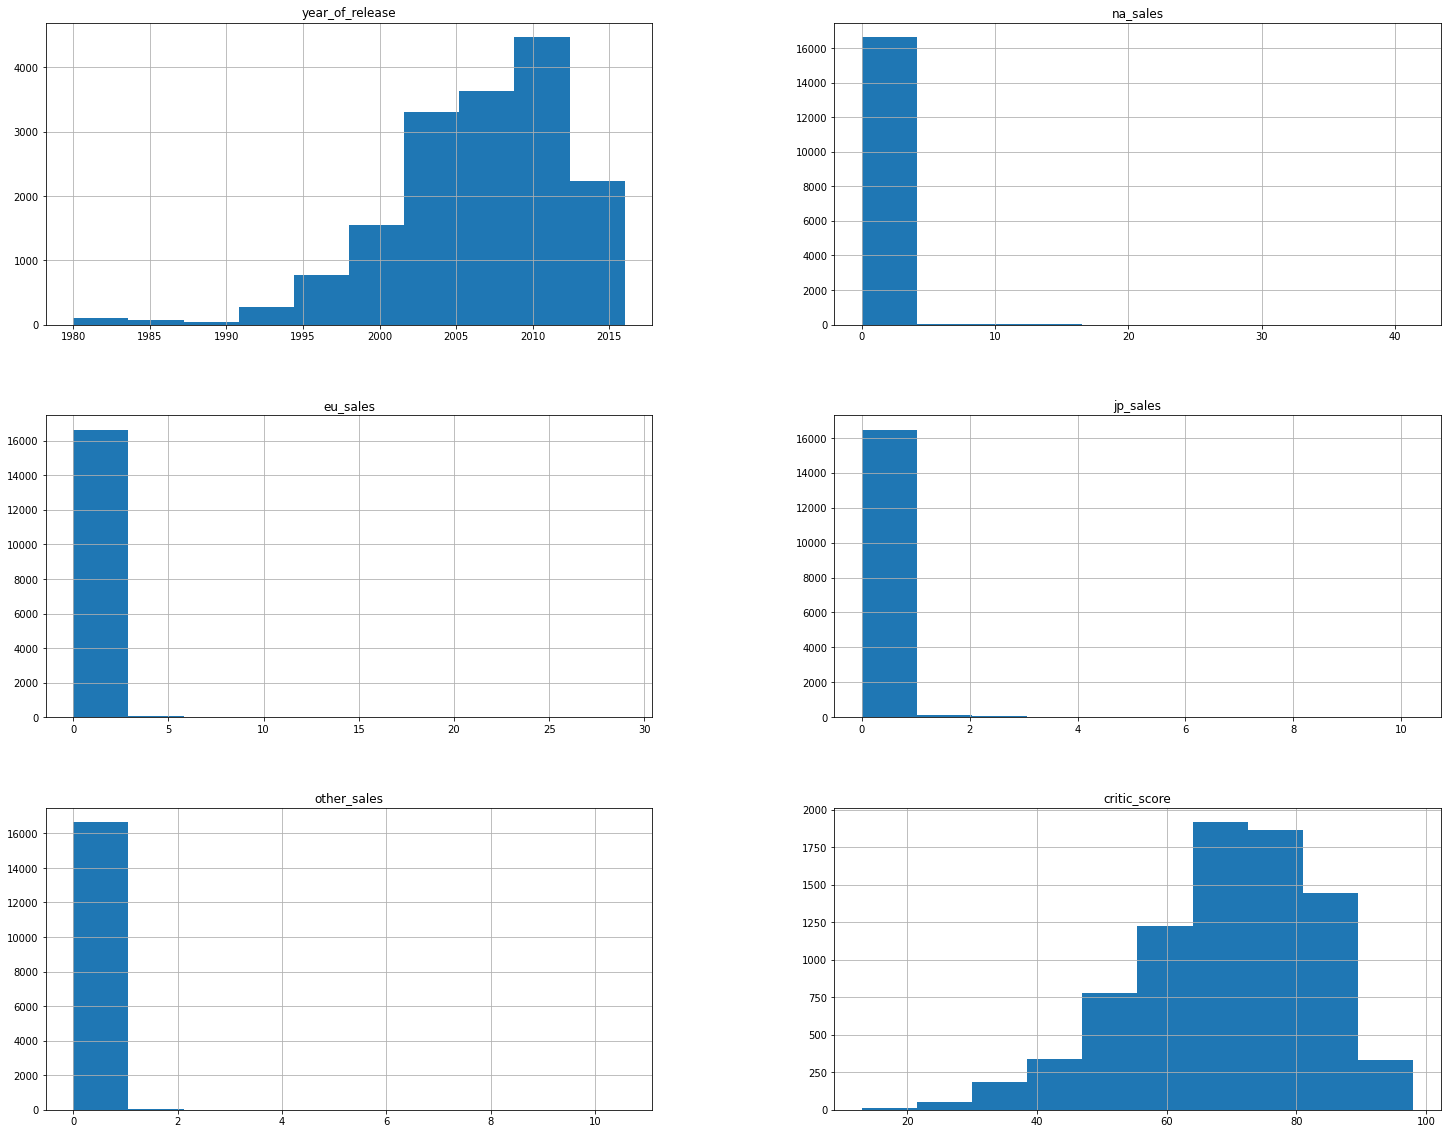

In [ ]:
data.hist(figsize=(25, 20));

Как видим, представлены игры с 1980 года, количество их росло до 2010 года, а далее снижение (возможно связано с заменой игровых консолей мобильными играми на сматрфонах). По продажам видим присутствие максимальных цифр по продажам но в малых количествах, при чем во всех регионах (возможно максимальные цифры связаны с какой то одной игрой или серией игр). По гистрограмме оценки критиков видим основные выставленные оценки находятся в интервале от 55 до 85, а вот 100 баллов никому не присвоили.

<a id="3-bullet"></a>
# **Предобработка данных**

Посмотрим наличие пропусков.

In [ ]:
display(data.isna().sum())
display((data.isna().mean()*100).round(2))

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

Всего 2 пропуска в названии игр, 269 в дате выхода игр. А вот в столбцах оценки критиков, пользователей, рейтинге пропусков достаточное количество.

Посмотрим на строки с пропущенными названиями.

In [ ]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Обе игры из 1993 года, в те года было не так много представлено игр (согласно ранее выведенной гистограмме). Попробуем отфильтровать игры выпущенные в 1993 году на платформе GEN.

In [ ]:
data[(data['platform'] == 'GEN') & (data['year_of_release'] == 1993.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


К сожелению по строкам с попущенными названиями мы можем лишь отметить что первая имело большие продажи на Американском континенте, а вторая продавалась только в Японии. Так как других данных для соотнесения что это за игры нет, то удаляем данные строки. Причина по которой названия не заполненны - техническая.

In [ ]:
data = data.dropna(subset=['name'])

Следующий столбец с пропусками год выхода игры. Посмотрим что это за игры.

In [ ]:
data[data['year_of_release'].isna()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Пропусков в столбце дата выхода игр менее 2%, варианты решения:
*   Удалить
*   Оставить как есть, или обозачить определенным значением (например "-1")
*   В некоторых названиях игр указаны года, можно попробовать их извлечь
*   Парсинг из гугла или википедии

Выберем второй вариант. Тип присвоим целочисленный.

Следующий столбцы с пропущенными значениями оценки критиков, пользователей и рейтинг. Выведим уникальные значения.

In [ ]:
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Оценка от критиков представлена в баллах, приведем ее к целочисленному типу. В столбце оценка от пользователей присутствует буквенное обозначение "tbd" (To Be Determined), то есть "Будет определено", заменим это на NaN и приведем весь столбец к вещественному типу.
И последний столбец рейтинг, абревиатуры обозначают следующее:
1.   «E» («Everyone») — «Для всех»
2.   «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
3.   «T» («Teen») — «Подросткам»
4.   «M» («Mature») — «Для взрослых»
5.   «AO» («Adults Only 18+») — «Только для взрослых»
6.   «RP» («Rating Pending») — «Рейтинг ожидается»
7.   «K-A» («Kids to Adults») — игры для детей и взрослых (использовался до 1998г, сейчас идет как рейтинг Е).
8.   «EC» («Early childhood») — «Для детей младшего возраста»

Рейтинг "К-А" отнесем к "Е", а "RP" к NaN. Тип оставим без изменений.

Что касается пропусков, оставляем без изменений, т.к. мы можем правильно определить оценки и рейтинг игр. Причина по которой не заполненны ячейки: игры могли выйти раньше чем появились официальные оценки; игры могли поступить на оценку только в момент среза данных; техническая ошибка; пользователи не оценивали игру (из за низкой популярности или находящиеся на других континентах).


<a id="4-bullet"></a>
Приведем типы данных к ранее описанным.

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('RP', np.NaN)
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = data['user_score'].astype('float')

Так как часть данных теряется при анализе рейтинга игр, ставлю "заглушку" на отсутствующие значения в столбце rating

In [ ]:
data['rating'] = data['rating'].fillna('unknown')

<a id="5-bullet"></a>
Проверим на наличие дубликатов

In [ ]:
data.duplicated().sum()

0

Проверим на неявные дубликаты для пары Имя-Игровая консоль

In [ ]:
data.duplicated(subset=['name','platform']).sum()

4

Выведим эти строки

In [ ]:
data[data.duplicated(subset=['name','platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


Как видим в таблице закрались дубликаты игр, так как названия, платформы, жанры, оценки и рейтинги совпадают то схлопним эти строки с суммированием продаж. В нескольких дубликатах есть различия в годах выпуска, считаю это технической ошибкой при внесении данных

In [ ]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = data.groupby(
    ['name','platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].transform('sum')

data = data.drop_duplicates(subset=['name','platform'], keep='first')

Дубликаты отсутствуют.

Подсчитаем суммарные продажи во всех регионах.

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

В этом разделе мы изучили наличие пропусков, оценили их вес в общей массе. При возможности заполнили эти пропуски, а также указали их возможные причины. Проверили наличия дубликатов, и очистили от них массив данных. Просмотрели какие данные внесены в столбцы, при необходимости их скорректировали, а также преобразовали типы данных в необходимые.

# **Анализ данных**

<a id="6-bullet"></a>
Построим график выпуска игр по годам.

Чтобы получить истинное количество «игр по годам» нам следует поискать дубликаты (используя subset по (Годам - Названиям игр) и затем исключить из полного датафрейма все дубли за исключением одной, «первой», строки.


In [ ]:
data[data.duplicated(subset=['name','year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,unknown,0.01


Действительно очень много неявных дубликатов. Для построения графика исключим их.

In [ ]:
data1 = data.drop_duplicates(subset=['name','year_of_release'], keep='first')

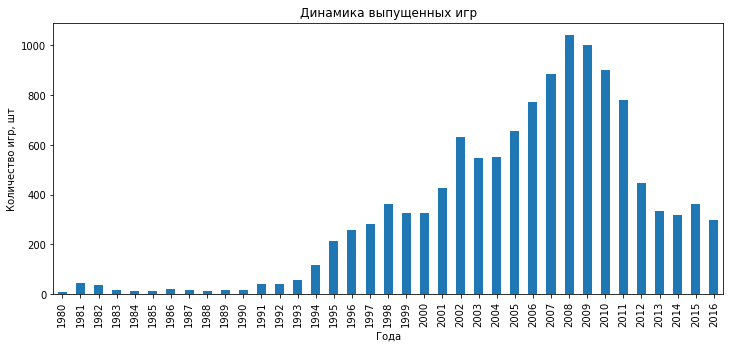

In [ ]:
data1.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count').plot(
    kind='bar',
    figsize=(12, 5),
    legend=False,
    title='Динамика выпущенных игр',
    ylabel='Количество игр, шт',
    xlabel='Года');

По графику видно что до 1993 года игр выпускалось менее 100 шт, начиная с 94-го года рост количества выпускаемых игр - связано прежде всего с появлением домашних ПК и игровых приставок (следствие развитие технической составляющей). Спад с 2009 года связываю с замещением игр на различных платформах на игры в смартфонах и планшетах, особенно детей, а взрослым уже либо некогда играть либо надоело. Также может сказываться демографический спад в эти года - можно было бы проверить корреляцию, только данных нет. Для анализа можно использовать данные за 1995 - 2016 гг.

<a id="7-bullet"></a>
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам.

In [ ]:
total_sales_platform = data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum').sort_values(by='total_sales', ascending=False)

total_sales_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<a id="8-bullet"></a>
Выделим топ 6 платформ в отдельный список.

In [ ]:
top_platform = total_sales_platform.iloc[:6,0:0]
top_platform.reset_index(drop= False , inplace= True )
top_platform = top_platform['platform'].tolist()

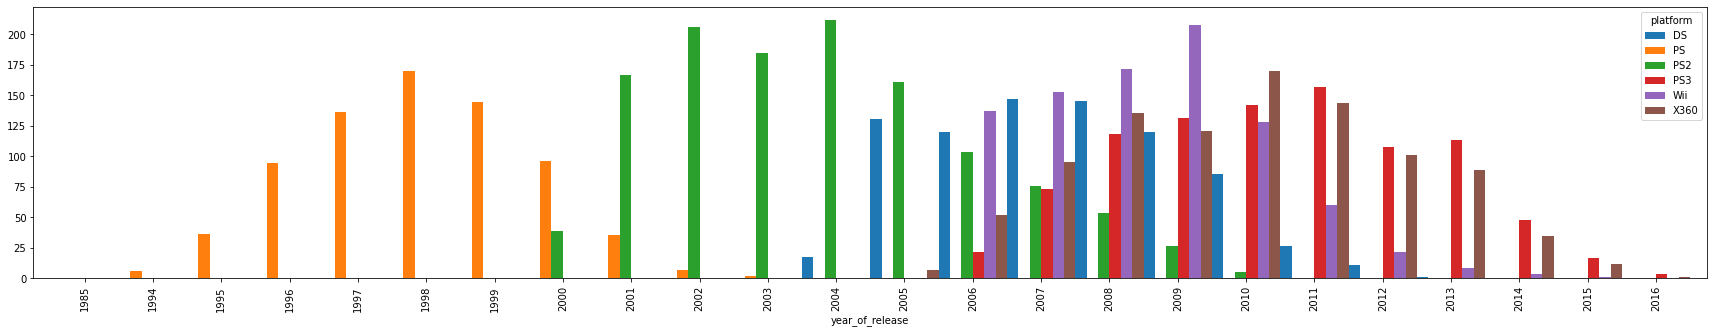

In [ ]:
(
data.query('platform in @top_platform')
    .pivot_table(index='year_of_release',
    columns = 'platform',
    values='total_sales',
    aggfunc='sum')
    .plot(kind='bar',
    width = 1,
    figsize=(30, 5))
);

<a id="9-bullet"></a>
Из графиков видно, что характерный срок существования платформы 11 лет, также отмечается снижение продаж в среднем начиная с 6 года существования платформы. Так как нам требуется сделать прогноз на 2017 год, то актуальным периодом для анализа будет с 2013 года, т.к. данных за период с 2013 по 2016 года нам будет достаточно чтобы выяделеить популярные платформы стадию их жизни (рост, пик, спад продаж).

In [ ]:
actual_data = data[data['year_of_release'] >= 2013]

In [ ]:
(
actual_data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False).head()
)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


<a id="10-bullet"></a>
5-ка лидеров по продажам (в порядке убывания): PS4, PS3, XOne, 3DS и X360. Посмотрим на какой стадии они находятся.

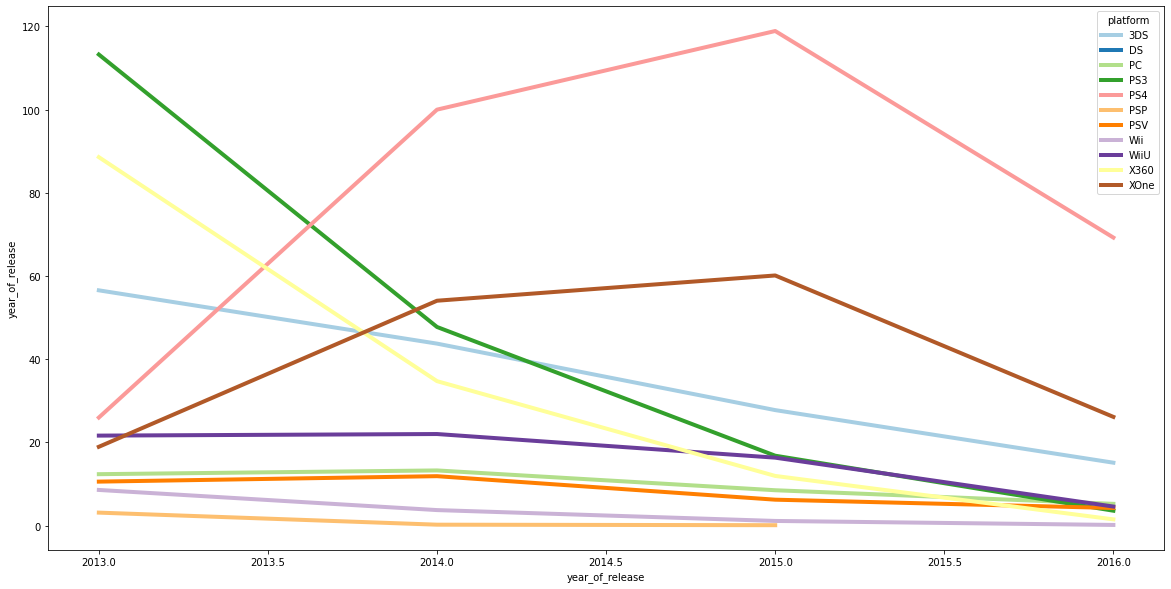

In [ ]:
(
actual_data.pivot_table(
    index='year_of_release',
    columns = 'platform',
    values='total_sales',
    aggfunc='sum')
    .plot(
        ylabel='year_of_release',
        colormap='Paired',
        linewidth=4,
        figsize=(20, 10))
);

PS4 - рост (с учетом не полных данных за 2016 год) </br>  
PS3 - падение  </br>  
XOne - рост (с учетом не полных данных за 2016 год) </br>  
3DS - падение </br>  
X360 - падение </br>  

**Таким образом потенциально прибыльными платформами на 2017 год являются: PS4 и XOne.**

Выведим ящики с усами.

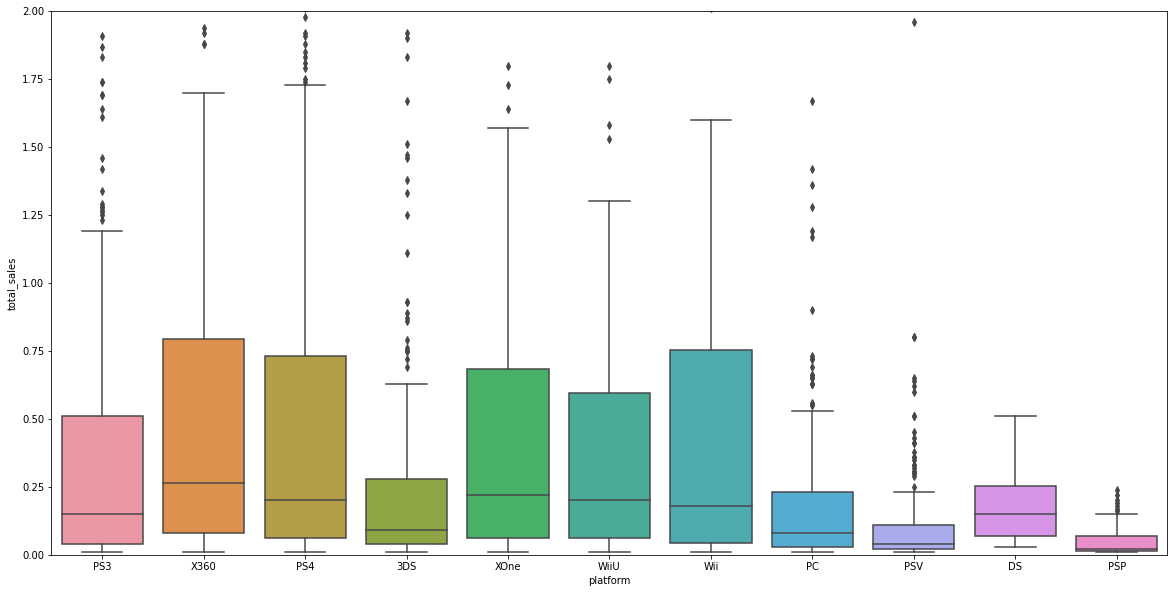

In [ ]:
plt.figure(figsize=(20,10))
plt.ylim(0, 2)
sns.boxplot(x='platform', y='total_sales', data=actual_data);

Увеличим масштаб "ящиков" чтобы были лучше видны квартили - для точного сравнения.


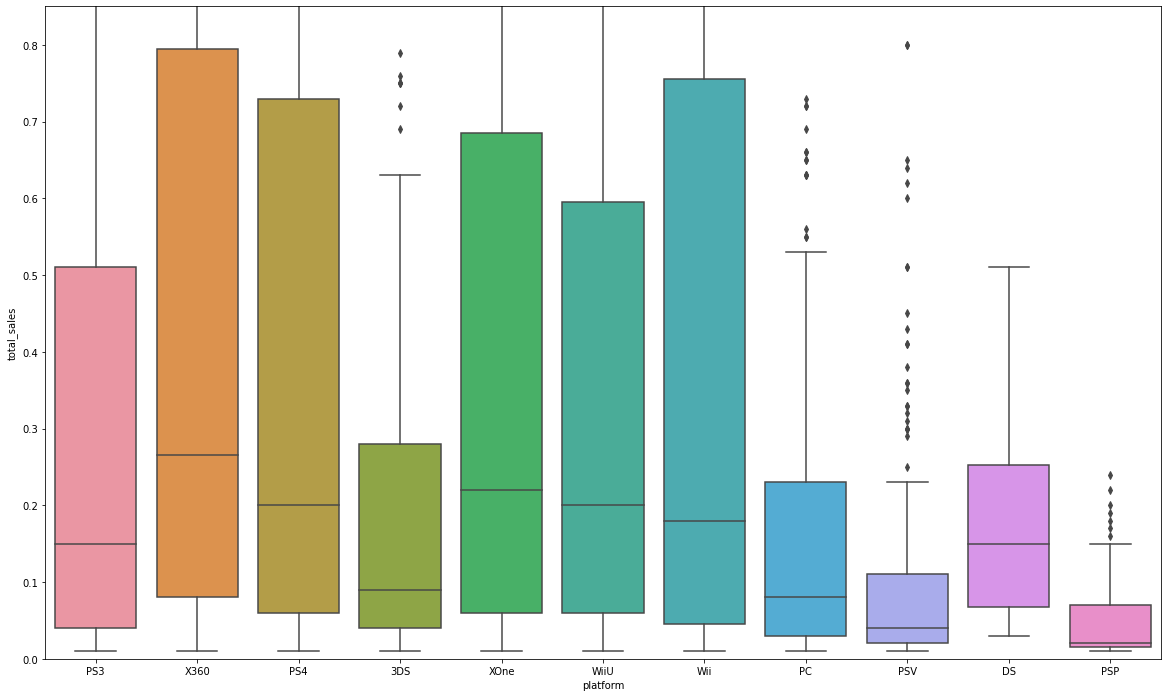

In [ ]:
plt.figure(figsize=(20,12))
plt.ylim(0, 0.85)
sns.boxplot(x='platform', y='total_sales', data=actual_data);

In [ ]:
#actual_data['platform', 'total_sales'].describe()

actual_data.groupby('platform')['total_sales'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.47,1.38,0.01,0.04,0.09,0.28,14.60
DS,8.0,0.19,0.17,0.03,0.07,0.15,0.25,0.51
PC,189.0,0.21,0.35,0.01,0.03,0.08,0.23,3.05
PS3,345.0,0.53,1.45,0.01,0.04,0.15,0.51,21.05
PS4,392.0,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSP,67.0,0.05,0.06,0.01,0.02,0.02,0.07,0.24
PSV,358.0,0.09,0.15,0.01,0.02,0.04,0.11,1.96
Wii,23.0,0.59,0.92,0.01,0.04,0.18,0.76,3.58
WiiU,115.0,0.56,1.04,0.01,0.06,0.20,0.60,7.09


По построенным диаграммам размаха видно, что медианное количество продаж не превышает 300 тыс продаж. По всем платформам (кроме DS) отмечается наличие больших выбросов за пределами левого "уса". Также стоит отметить, что по положениям медианы относительно квартилей, вид гистограммы распределения продаж будет иметь вид с "вытянутым хвостом". Максимальное медианное значение у платформы X360, далее следует группа платформ с очень близкими показаниями по медиане (PS4, XOne, WiiU, Wii). Минимальной медианой отмечается платформы PSP и PSV.

<a id="11-bullet"></a>
Определение корреляции между оценкой и продажами проведем на популярной платформе PS4.

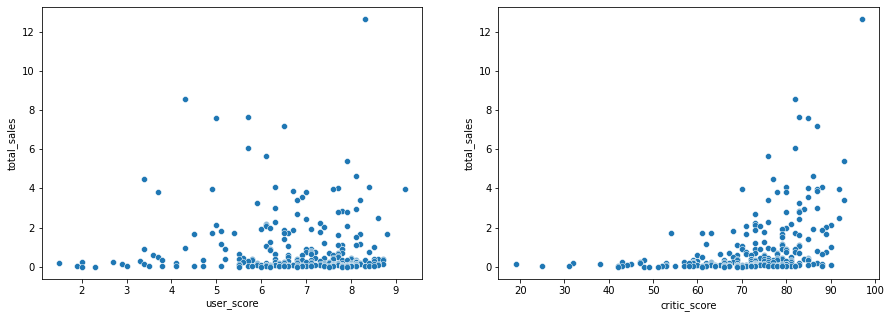

In [ ]:
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform == "PS4"'), ax=ax[0]);
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform == "PS4"'), ax=ax[1]);

По построенным диграммам рассеяния прослеживается связь между количество продаж и оценкой критиков (чем больше оценка - тем больше продаж), явной зависимости оценки пользователей и продажами не выявлено.

In [ ]:
actual_data.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Согласно построенной таблице, отмечается положительная корреляция между продажами и оценкой критиков (Коэфф.корр.=0,4), а корреляция между продажами о оценкой пользователей отсутствует. Также следует отметить о наличии положительной корреляции меджу оценками пользователей и критиков.

Посмотрим как эти выводы соотносятся на других платформах.

In [ ]:
platform = actual_data['platform'].unique().tolist()

In [ ]:
for i in platform:
  display(i)
  display(actual_data[actual_data['platform'] == i][['total_sales', 'critic_score', 'user_score']].corr())
  print()

'PS3'

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


'X360'

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


'PS4'

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


'3DS'

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


'XOne'

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


'WiiU'

,total_sales,critic_score,user_score
total_sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


'Wii'

,total_sales,critic_score,user_score
total_sales,1.000000,NaN,0.682942
critic_score,NaN,NaN,NaN
user_score,0.682942,NaN,1.000000


'PC'

,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


'PSV'

,total_sales,critic_score,user_score
total_sales,1.000000,0.254742,0.000942
critic_score,0.254742,1.000000,0.611521
user_score,0.000942,0.611521,1.000000


'DS'

,total_sales,critic_score,user_score
total_sales,1.0,NaN,NaN
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN


'PSP'

,total_sales,critic_score,user_score
total_sales,1.0,NaN,-1.0
critic_score,NaN,NaN,NaN
user_score,-1.0,NaN,1.0


Согласно построенным таблицам корреляции:
1.   Отмечется отсутстсвие корреляции между оценкой пользователей и продажами (кроме платформ: Wii, WiiU и 3DS)
2.   Отмечается положительная средне-умеренная корреяция между продажами и оценкой критиков
3.   Отмечается средняя положительная корреляция между оценками
4.   Присутсвуют данные с пустыми значениями

Далее проаназируем игры по жанрам: оценим количество игр по жанрам, а также оценим продажи по жанрам.

In [ ]:
(
actual_data.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=('count', np.median))
    .sort_values(by='median', ascending=False)
)

,count,median
genre,,
Shooter,187,0.450
Sports,214,0.240
Platform,74,0.225
Role-Playing,292,0.125
Fighting,80,0.125
Racing,85,0.120
Action,766,0.110
Simulation,62,0.100
Misc,155,0.100


По продажам самым прибыльным является жанр "Shooter" - имеет максимальное медианное значение по продажам в мире. Далее с большим отрывом следуют жанры: "Sports", "Platform". Также можно выделить трех аутсайдеров по жанрам: "Strategy", "Puzzle" и "Adventure".

<a id="12-bullet"></a>
Оценим популярность платформ и жанров для каждого региона.

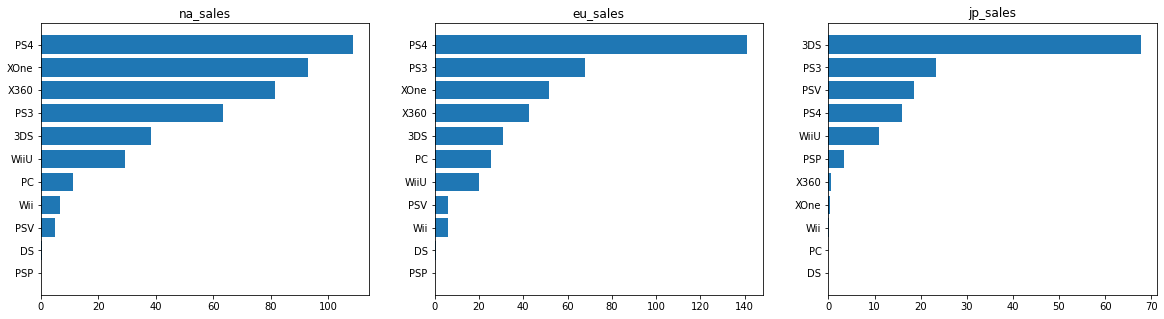

In [ ]:
na = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
na.reset_index(drop= False , inplace= True )
eu = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
eu.reset_index(drop= False , inplace= True )
jp = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
jp.reset_index(drop= False , inplace= True )

fig, ax = plt.subplots(1 ,3, figsize=(20,5))
ax[0].set_title('na_sales')
ax[1].set_title('eu_sales')
ax[2].set_title('jp_sales')
ax[0].barh(na['platform'], na['na_sales']);
ax[1].barh(eu['platform'], eu['eu_sales']);
ax[2].barh(jp['platform'], jp['jp_sales']);

Топ 5 популярных игровых платформ для регионов Северной Америки и Европы совпадают. Лидеров являеться PS4. Замыкает 5-ку 3DC.
Эта же платформа в Японском регионе занимает первое место, и в отличии от Америки и Европы в Топ5 включает себя платформы WiiU и PSV. Предполагаю что это связано с распространенностью платформ по регионам.

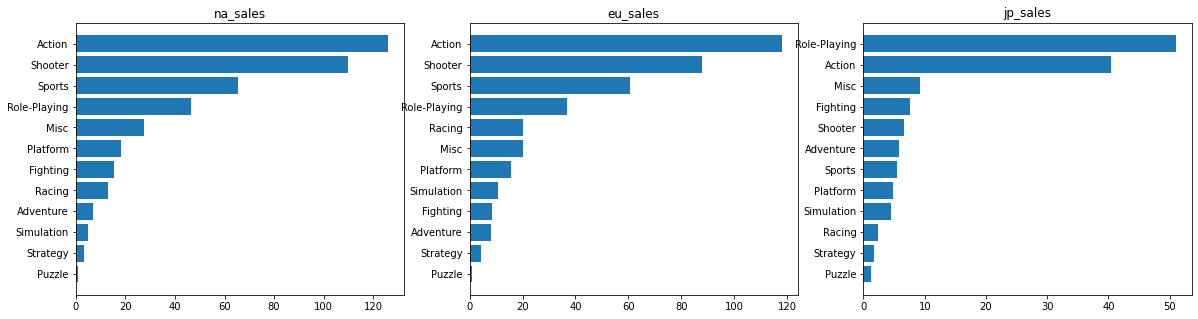

In [ ]:
na = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
na.reset_index(drop= False , inplace= True )
eu = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
eu.reset_index(drop= False , inplace= True )
jp = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
jp.reset_index(drop= False , inplace= True )

fig, ax = plt.subplots(1 ,3, figsize=(20,5))
ax[0].set_title('na_sales')
ax[1].set_title('eu_sales')
ax[2].set_title('jp_sales')
ax[0].barh(na['genre'], na['na_sales']);
ax[1].barh(eu['genre'], eu['eu_sales']);
ax[2].barh(jp['genre'], jp['jp_sales']);

Что касается жанров, то топ4 в Америке и Европе совпадают (жанры от наиболее популярных к менее: Action, Shooter, Sports, Role-Playing), а вот в пятой позиции есть отличия в Америке это Misc, а в Европе Racing. В Японии на первом месте игры ролевого жанра, также в пятерку популярных попали Action, Misc, Fighting, Shooter. По числу продаж видно что Япония меньший регион чем Америка или Европа.

<a id="13-bullet"></a>
Оценим влияние рейтина ESRB на продажи.

In [ ]:
actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
unknown,78.91,85.05,89.42


Из таблицы видно что для Америки и Европы первое место занимает игры с рейтингом "М". А вот в Японии пользуються популярностью игры без рейтинга. Построим для наглядности графики.

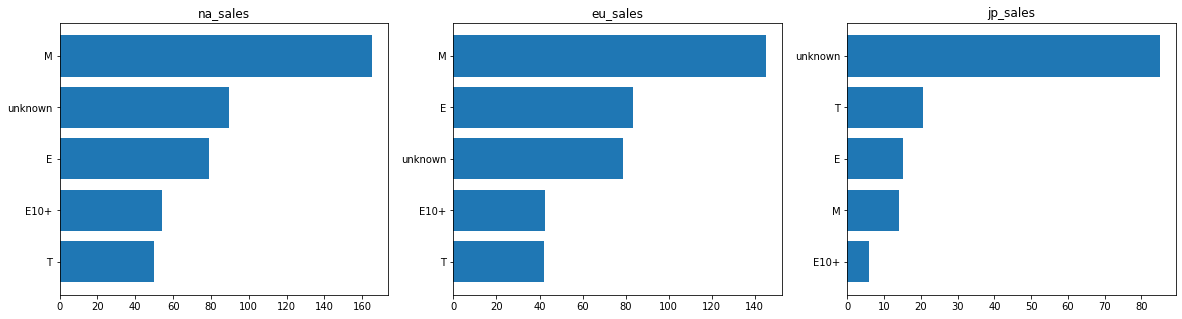

In [ ]:
na = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
na.reset_index(drop= False , inplace= True )
eu = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
eu.reset_index(drop= False , inplace= True )
jp = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
jp.reset_index(drop= False , inplace= True )

fig, ax = plt.subplots(1 ,3, figsize=(20,5))
ax[0].set_title('na_sales')
ax[1].set_title('eu_sales')
ax[2].set_title('jp_sales')
ax[0].barh(na['rating'], na['na_sales']);
ax[1].barh(eu['rating'], eu['eu_sales']);
ax[2].barh(jp['rating'], jp['jp_sales']);

Действительно в Японии не пользуються популярностью игры с рейтингом, возможно, большинство игр в Японии являються локальными и не продаються в Америке и соответственно не попадает в рейтинг.

<a id="14-bullet"></a>
Далее проверим несколько гипотез.
Первая "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
Вторая "Средние пользовательские рейтинги жанров Action и Sports разные".

Начнем в первой.

*Нулевая гипотеза будет звучать так:* **Средние пользовательские рейтинги платформ Xbox One и PC равны** </br>  
*Альтернативная гипотеза:* **Средние пользовательские рейтинги платформ Xbox One и PC разные** </br>  
Критический уровень статистической значимости зададим 0.05.


In [ ]:
alpha=0.05

results = st.ttest_ind(
    actual_data[(actual_data['platform'] == 'XOne')
    & (actual_data['user_score'] > 0)]['user_score'], actual_data[(actual_data['platform'] == 'PC')
    & (actual_data['user_score'] > 0)]['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод по проверки первой гипотезы - пользовательские рейтинги платформ Xbox One и PC равны.**

Переходим ко второй.

*Нулевая гипотеза будет звучать так:* **Средние пользовательские рейтинги жанров Action и Sports равны** </br>  
*Альтернативная гипотеза:* **Средние пользовательские рейтинги жанров Action и Sports разные** </br>  
Критический уровень статистической значимости зададим 0.05.

In [ ]:
alpha=0.05

results = st.ttest_ind(
    actual_data[(actual_data['genre'] == 'Action')
    & (actual_data['user_score'] > 0)]['user_score'], actual_data[(actual_data['genre'] == 'Sports')
    & (actual_data['user_score'] > 0)]['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод по проверки второй гипотезы - пользовательские рейтинги жанра Action и Sports разные.**

Для проверки гипотез применил t-тест, так как сравниваемые показатели представляют из себя выборку значений оценок. Параметр equal_var задавал False, т.к. есть сомнения, что дисперсии у совокупностей одинаковые.

<a id="15-bullet"></a>
# **Общий вывод**

**Предобработка данных** </br>
Изучили данные и привели названия столбцов к нижнему регистру.
Изучили в каких данных имеються пропуски, отметили возможную причину их озникновения. Абревиатуру "tbd" (To Be Determined),  "Будет определено" заменили это на NaN. Привели к необходимыи типам значений. </br>

**Анализ данных**
* Отметили что рост игр начался с 1993 года, а пик пришелся на 2008-09 гг  с последующим снижением. Определили что характерный срок существования платформы составляет 11 лет, в первые 5 лет идет рост, а далее падение количества продаж.
Выбрали актуальный период для анализа с 2013 по 2016 гг.
* Потенциально прибыльными платформами на 2017 год являются: PS4 и XOne. Построили диаграммы размаха для всех платформ. Выявили положительную среднюю корреляцию между оценками критиков и объёмами продаж. Топ жанров игр "Shooter", "Sports" и " Platform ". Антирейтинг игровых жанров: " Strategy ", " Puzzle ", " Adventure ".
* По популярности платформ пользователи Америки и Европы едины. А вот рынок Японии отличается, где присутствуют локальные платформы. Аналогичные закономерности выявлены по жанрам игр.
* Рейтинг ESRB не влияет на продажи в Японском регионе, в то время как в Америке и Европе отдается предпочтение играм для взрослых.
* Подтвердили гипотезу, что пользовательские рейтинги платформ Xbox One и PC равны. Опровергли гипотезу, что пользовательские рейтинги жанра Action и Sports равны.

**Отвечая на вопрос цели исследования потенциально популярный продукт для планирования рекламной кампании:  
•	Для Америки и Европы это игры на платформе PS4 или XOne, жанр  "Shooter", с рейтингом ESRB «M» («Mature») — «Для взрослых»  
•	Для Японского региона наиболее популярной платформой является 3DS, жанр Role-Playing.  
•	Стоить отметить что продажи в Японии в 3 раза меньше чем продажи в западных странах**
